In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Create mask for dresses and sandals

In [3]:
train_mask = (y_train == 3) | (y_train == 5)
test_mask = (y_test == 3) | (y_test == 5)

In [4]:
x_train[train_mask].shape

(12000, 28, 28)

Filter out dresses and sandals and change class labels to `0`, `1`

In [5]:
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

y_train[y_train == 3] = 0
y_train[y_train == 5] = 1
y_test[y_test == 3] = 0
y_test[y_test == 5] = 1

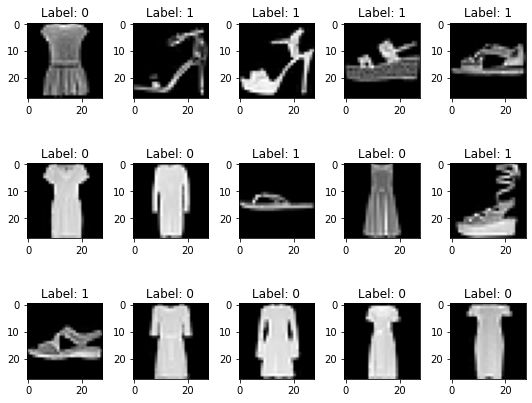

In [6]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

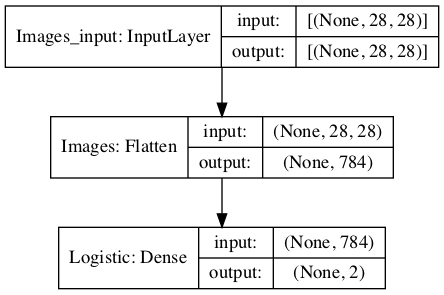

In [22]:
batchSize = 128
nEpochs = 50

model = tf.keras.Sequential()

# Layer0 simply flattens image input
layer0 = tf.keras.layers.Flatten(input_shape=np.shape(x_train[0]), name='Images')
model.add(layer0)

# Layer1 is the output layer
numUnits_L1 = 2
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer1)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Plot Logistic Regression Network
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [8]:
# Normalizing input (this step doesn't seem to be critical)
x_train = x_train/255.0
x_test = x_test/255.0

# Train the model
trHistory = model.fit(x=x_train, y=y_train, batch_size=batchSize, epochs=nEpochs,shuffle=False, validation_split=0.0)

Epoch 1/50
94/94 [==============================] - 0s 741us/step - loss: 0.1256 - accuracy: 0.9642
Epoch 2/50
94/94 [==============================] - 0s 690us/step - loss: 0.0251 - accuracy: 0.9981
Epoch 3/50
94/94 [==============================] - 0s 683us/step - loss: 0.0163 - accuracy: 0.9981
Epoch 4/50
94/94 [==============================] - 0s 683us/step - loss: 0.0123 - accuracy: 0.9983
Epoch 5/50
94/94 [==============================] - 0s 687us/step - loss: 0.0101 - accuracy: 0.9985
Epoch 6/50
94/94 [==============================] - 0s 679us/step - loss: 0.0086 - accuracy: 0.9987
Epoch 7/50
94/94 [==============================] - 0s 685us/step - loss: 0.0075 - accuracy: 0.9989
Epoch 8/50
94/94 [==============================] - 0s 685us/step - loss: 0.0067 - accuracy: 0.9991
Epoch 9/50
94/94 [==============================] - 0s 716us/step - loss: 0.0061 - accuracy: 0.9992
Epoch 10/50
94/94 [==============================] - 0s 718us/step - loss: 0.0056 - accuracy: 0.9992

## Predictions

In [15]:
predictions = model.predict(x_test) # output is a matrix of probabilities where each row corresponds to an image in the Test Set

idCount = 0
nErrs = 0
errors = []

for _ in predictions:
    predictedLabel = np.argmax(_)
    if predictedLabel != y_test[idCount]:
        errors.append(idCount)
        nErrs += 1
    idCount += 1

errRate = nErrs / float(np.shape(x_test)[0])
print("Prediction Error = %f" %errRate)

Prediction Error = 0.001000


### Errors

In [16]:
errors

[552, 1101]

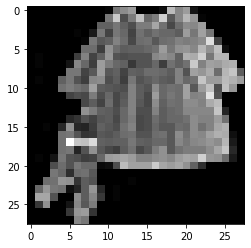

In [20]:
plt.imshow(x_test[552], cmap='gray')
plt.show()

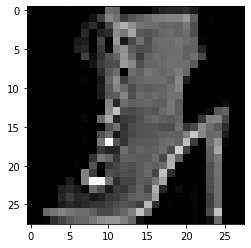

In [21]:
plt.imshow(x_test[1101], cmap='gray')
plt.show()